# Business understanding

Hotayi electronics is an electronic manufacturing company based in Malaysia that provides such services like designing, assembling, and testing which are high value added services and started in 1992. In electronic manufacturing companies, machine downtime and failure are the essential concerns for the company. It leads to customer attrition where it might directly affect the revenues and image of the company.  In order to prevent that, Hotayi electronics would like to do prediction on machine failure, to reduce machine downtime and to optimize machine operations. 

Over these years, Hotayi electronics had accumulated many technical expertise and experiences in manufacturing core strengths, this helped Hotayi electronics  to become a leading solution manufacturing provider which was able to meet and exceed the demands and requirements of customers in Quality, Cost and Delivery requirements. Hotayi Electronics strives to build a platform for talented people from different areas to gather, work together, learn together, grow together, and accomplish the impossible together.


In [1]:
#library for file control
from os import listdir, remove, rmdir

#library for data visualization
import pandas as pd
from pandas.api.types import CategoricalDtype
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

#deployment
import pickle


# Merge dataset

#### Convert all sub file into single file

In [2]:
def merge_into_single_file(folder):
    data_list = []
    for fold in folder:
        print("Start loading this file:",fold)
        file = listdir(fold)
        for f in file:
            data = pd.read_csv(fold+'/'+f)
            data_list.append(data)
            remove(fold+'/'+f)
        df = pd.concat(data_list, ignore_index=True)
        df.sort_values(by='Time')
        df.to_csv(fold+'/'+"data.csv", index = False, header=True)
        data_list = []
        print("Done convert the file:"+fold)
        
    print("All done!")

#### get all folder path

In [3]:
def my_folder(my_path):
    #load the list of first round file name
    first_round_folder = listdir(my_path)
    
    #load the list of second round file name
    second_folder_list = []
    for first_folder in first_round_folder:
        second_folder = listdir(my_path + first_folder)
        for folder in second_folder:
            second_folder_list.append(my_path + first_folder+ "/" + folder)
    
    return second_folder_list#merge all file in the folder       


### read file

In [4]:
#read all file
def read_all_file(folder):
    data_list = []
    for fold in folder:
        data = pd.read_csv(fold+"/data.csv")
        data_list.append(data)
        
    df = pd.concat(data_list, ignore_index=True)
    return df

# Data Understanding

In this project, we are using data provided by Hotayi Electronic with around 28 files that contain data in total of  around 200 thousands with 13 columns. Since the given data is not that large as we expected, we decided to merge all data csv files into one file per folder in order to save the time cost of reading the data. The merged file contains a number of data, in exact amount is 232,043.

In [5]:
#folder = my_folder('./Dataset/Result_MC1_2021_01/')
#merge_into_single_file(folder)
    

folder = my_folder('./Dataset/Result_MC2_2021_01/')
data_MC1 = read_all_file(folder)
data_MC1.head()

,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,Unnamed: 12,Unnamed: 9,Unnamed: 10,(um)Point5,Unnamed: 13
0,791-00529,1,P 8 7,2021-01-04,07:33:02,PA05-1901,OK,OK,24.6,16.9,-19.8,41.4,NaN,NaN,NaN,NaN,NaN
1,791-00529,1,P 8 7,2021-01-04,09:14:34,PA05-1901,OK,OK,9.1,5.9,-26.3,15.3,NaN,NaN,NaN,NaN,NaN
2,791-00529,1,P 8 7,2021-01-04,09:28:25,PA05-1901,OK,OK,59.6,32.3,19.0,89.8,NaN,NaN,NaN,NaN,NaN
3,791-00529,1,P 8 7,2021-01-04,22:42:38,PA05-1901,OK,OK,67.2,37.2,10.0,101.7,NaN,NaN,NaN,NaN,NaN
4,791-00529,10,P 8 7,2021-01-04,07:34:14,PA05-1901,OK,OK,-1.8,6.0,54.7,99.6,NaN,NaN,NaN,NaN,NaN


### Remove blank columns

In the process of merging the csv files, it will auto generate some unnamed columns which actually provide nothing and not meant to be any information that is necessary. Therefore, those unnamed columns will be dropped before we prepare our data for the step. 

In [6]:
data_MC1 = data_MC1.drop(columns=['Unnamed: 12','Unnamed: 9','Unnamed: 10','Unnamed: 13'])
data_MC1

,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,791-00529,1,P 8 7,2021-01-04,07:33:02,PA05-1901,OK,OK,24.6,16.9,-19.8,41.4,NaN
1,791-00529,1,P 8 7,2021-01-04,09:14:34,PA05-1901,OK,OK,9.1,5.9,-26.3,15.3,NaN
2,791-00529,1,P 8 7,2021-01-04,09:28:25,PA05-1901,OK,OK,59.6,32.3,19.0,89.8,NaN
3,791-00529,1,P 8 7,2021-01-04,22:42:38,PA05-1901,OK,OK,67.2,37.2,10.0,101.7,NaN
4,791-00529,10,P 8 7,2021-01-04,07:34:14,PA05-1901,OK,OK,-1.8,6.0,54.7,99.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232038,21312,4679,213123,2021-01-31,06:47:05,PA05-1901,OK,OK,11.3,8.6,54.0,9.2,34.9
232039,21312,4680,213123,2021-01-31,06:47:05,PA05-1901,OK,OK,17.9,6.7,78.8,18.0,20.0
232040,21312,4681,213123,2021-01-31,06:47:05,PA05-1901,OK,OK,14.1,8.7,54.6,14.3,20.6
232041,21312,4682,213123,2021-01-31,06:47:05,PA05-1901,OK,OK,6.1,12.8,49.4,21.5,22.1


### Datatype understanding

After we have adjusted the column, the data type for the remaining columns are int64, object and also float64 as in the diagram below.

In [7]:
print("Data types:")
print(data_MC1.dtypes)

Data types:
Part               object
IC 2D              object
Lot                object
Date               object
Time               object
Machine            object
Server result      object
Machine result     object
(um)Point1        float64
(um)Point2        float64
(um)Point3        float64
(um)Point4        float64
(um)Point5        float64
dtype: object


### Display all features of dataset

In this project and the data provided by Hotayi, the most important and widely used are the Machine result as the main target whether it succeeds or not, (μm)Point 1-5 which is measured in micrometers(μm). Other columns which do not mention just now will be used when it is necessary such as date and time, etc. There are missing values for some features such as Point2, Point3, Point3, Point4 respectively 11898, 20628, 20628 and 227339. Not only that, there are also unique values for all features in the dataset.

In [8]:
print("Total rows    :",data_MC1.shape[0])
print("Total columns :",data_MC1.shape[1])
print("\nFeatures :\n",data_MC1.columns.tolist())
print("\nMissing Values :\n",data_MC1.isnull().sum())
print("\nUnique values :\n",data_MC1.nunique())

Total rows    : 232043
Total columns : 13

Features :
 ['Part', 'IC 2D', 'Lot', 'Date', 'Time', 'Machine', 'Server result', 'Machine result', '(um)Point1', '(um)Point2', '(um)Point3', '(um)Point4', '(um)Point5']

Missing Values :
 Part                   0
IC 2D                  0
Lot                    0
Date                   0
Time                   0
Machine                0
Server result          0
Machine result         0
(um)Point1             0
(um)Point2         11898
(um)Point3         20628
(um)Point4         20628
(um)Point5        227339
dtype: int64

Unique values :
 Part                  5
IC 2D             46498
Lot                   5
Date                 28
Time              24317
Machine               1
Server result         1
Machine result        2
(um)Point1        13602
(um)Point2        13405
(um)Point3        12223
(um)Point4        11214
(um)Point5         1083
dtype: int64


### Showing sum of "OK" and "NG"

Shows the ‘Machine result’ column contains two unique results which are ‘NG’ and ‘OK’. There are 9,177 results of ‘NG’ and 222,866 results of ‘OK’. 

In [9]:
#to get the total number for 'OK' and 'NG'
print(data_MC1['Machine result'].unique())
data_MC1['Machine result'].value_counts()

['OK' 'NG']


OK    222866
NG      9177
Name: Machine result, dtype: int64

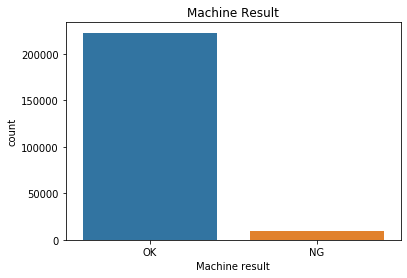

In [10]:
#barchart for Machine Result
sns.countplot(x="Machine result", data=data_MC1).set_title('Machine Result')
plt.show()

### Display the machine result on every date

it indicates all the machine results either NG or Ok from time 2021-01-04 until 2021-01-31. In this diagram, it clearly shows that 2021-01-18 got the highest numbers of success of machines with around 16000 while the lowest number of ‘NG’ results of machines was about 12 ‘NG’ out of 1902 in 2021-01-10. We can conclude that in this month, the number of machines with ‘OK’ results are roughly 6000 to 8000.

In [11]:
data_MC1.groupby(['Date'])["Machine result"].value_counts()

Date        Machine result
2021-01-04  OK                 6778
            NG                  159
2021-01-05  OK                10640
            NG                  154
2021-01-06  OK                 1132
            NG                  140
2021-01-07  OK                 1855
            NG                   59
2021-01-08  OK                 4596
            NG                   36
2021-01-09  OK                 6892
            NG                  736
2021-01-10  OK                 1694
            NG                  315
2021-01-11  OK                 7346
            NG                   70
2021-01-12  OK                10138
            NG                   14
2021-01-13  OK                10761
            NG                   75
2021-01-14  OK                 9743
            NG                   13
2021-01-15  OK                 8522
            NG                  658
2021-01-16  OK                10404
            NG                  360
2021-01-17  OK                 3381
 

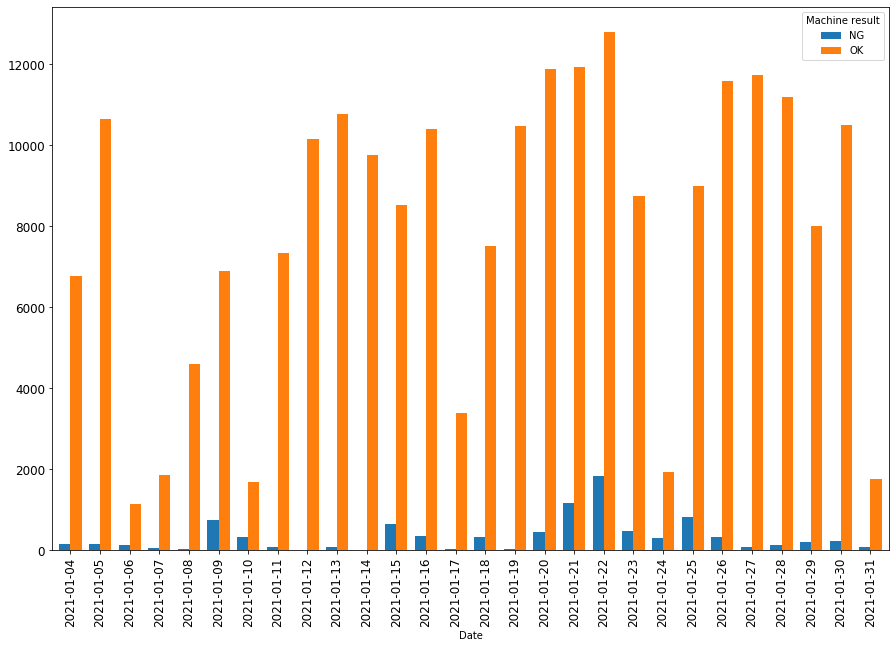

In [12]:
#display bar chart
data_MC1.groupby(["Date"])["Machine result"].value_counts().unstack().plot.bar(figsize=(15,10),fontsize = 12, width = 0.75)

### Display the machine result on week day

Show all the machine results from Monday to Sunday are either NG or OK. In this picture, it clearly shows that the highest number of machine results ‘OK’,42831 and the lowest number of machine results ‘NG’,505 obtained on Tuesday.

In [13]:
#determining the number of 'OK' and 'NG' for each days of a week
data_MC1["Date"]= pd.to_datetime(data_MC1["Date"])

sort = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sort_type = CategoricalDtype(categories=sort, ordered=True)

data_MC1['Week_day'] = data_MC1['Date'].dt.day_name()
data_MC1['Week_day'] = data_MC1['Week_day'].astype(sort_type)

week = data_MC1.groupby(['Week_day', 'Machine result']).size()
week

Week_day   Machine result
Monday     NG                 1371
           OK                30638
Tuesday    NG                  505
           OK                42831
Wednesday  NG                  732
           OK                35498
Thursday   NG                 1364
           OK                34694
Friday     NG                 2715
           OK                33889
Saturday   NG                 1780
           OK                36534
Sunday     NG                  710
           OK                 8782
dtype: int64

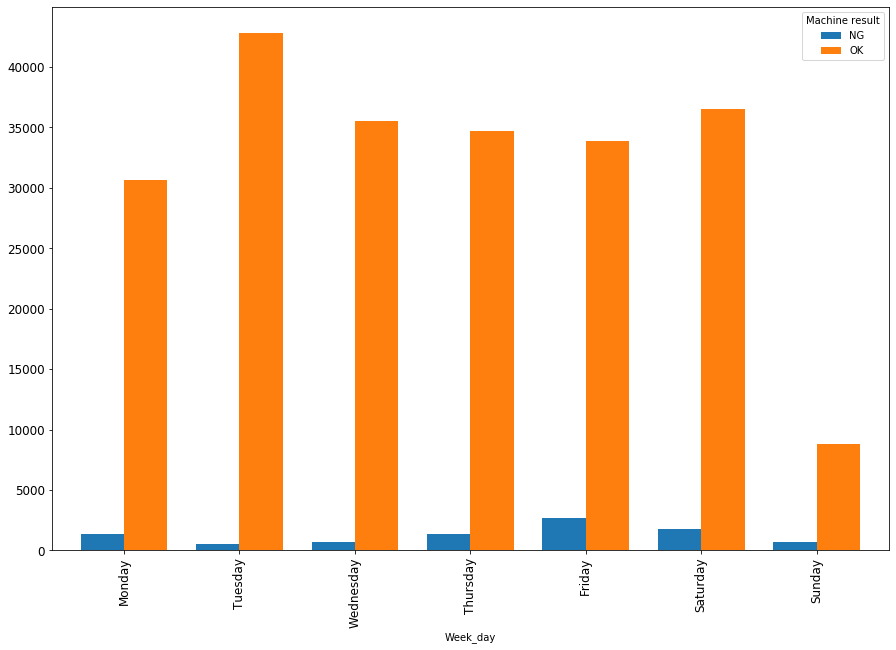

In [14]:
#display bar chart
data_MC1.groupby(["Week_day"])["Machine result"].value_counts().unstack().plot.bar(figsize=(15,10),fontsize = 12, width = 0.75)

### Boxplot

The box plot shows the median of the data on different features with a red line. The two ends of the box represent Quartile 1 (Q1) and Quartile 3 (Q3). The space of the box represents the Interquartile range of the entire feature data. The two lines outside the box respectively indicate the minimum score and the maximum score of the feature data. From the figure also can find out that there are some points, which represent the outliers.

C:\Users\ProAdmin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


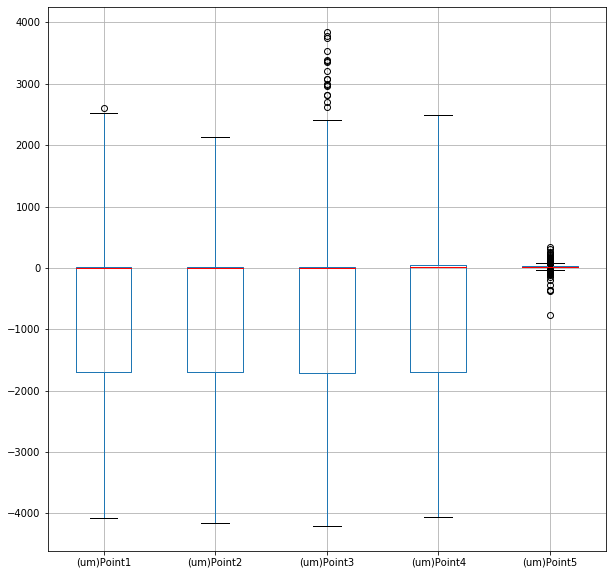

In [15]:
data_MC1.boxplot(column=['(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5'], figsize=(10,10),color={'medians': 'red'})

### Box plot on every (um)Point with machine result

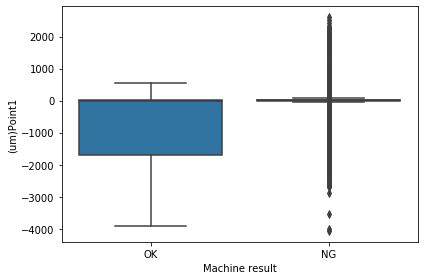

In [16]:
sns.boxplot(x='Machine result',y='(um)Point1',data=data_MC1)
plt.tight_layout()
plt.show()

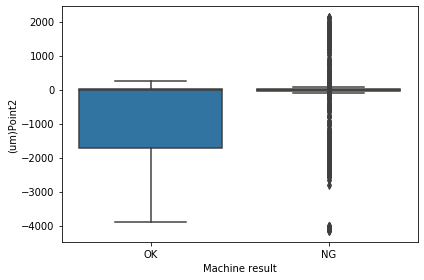

In [17]:
sns.boxplot(x='Machine result',y='(um)Point2',data=data_MC1)
plt.tight_layout()
plt.show()

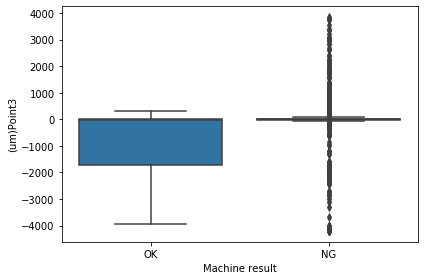

In [18]:
sns.boxplot(x='Machine result',y='(um)Point3',data=data_MC1)
plt.tight_layout()
plt.show()

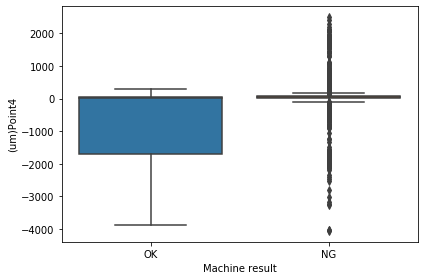

In [19]:
sns.boxplot(x='Machine result',y='(um)Point4',data=data_MC1)
plt.tight_layout()
plt.show()

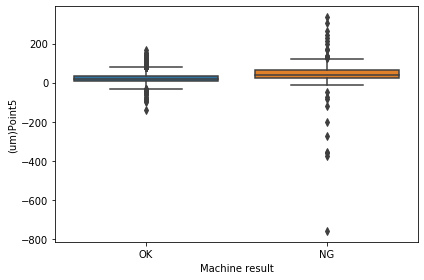

In [20]:
sns.boxplot(x='Machine result',y='(um)Point5',data=data_MC1)
plt.tight_layout()
plt.show()

### Summary of statistics

In [21]:
data_MC1[['(um)Point1','(um)Point2', '(um)Point3','(um)Point4','(um)Point5']].describe()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
count,232043.000000,220145.000000,211415.000000,211415.000000,4704.000000
mean,-644.906859,-602.556153,-560.104696,-530.049983,24.599001
std,875.325612,859.571208,862.319208,853.196434,31.150911
min,-4069.500000,-4159.300000,-4207.700000,-4066.200000,-760.000000
25%,-1697.100000,-1699.700000,-1708.600000,-1692.000000,8.700000
50%,0.700000,-8.800000,-7.900000,9.600000,21.000000
75%,14.300000,8.000000,12.300000,50.000000,37.325000
max,2605.300000,2134.400000,3845.500000,2498.200000,335.600000


### Correlation between columns

In [22]:
data_MC1[['(um)Point1','(um)Point2', '(um)Point3','(um)Point4','(um)Point5']].corr()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
(um)Point1,1.000000,0.983415,0.974408,0.977703,-0.024350
(um)Point2,0.983415,1.000000,0.976290,0.981081,-0.168653
(um)Point3,0.974408,0.976290,1.000000,0.989355,0.243948
(um)Point4,0.977703,0.981081,0.989355,1.000000,0.324892
(um)Point5,-0.024350,-0.168653,0.243948,0.324892,1.000000


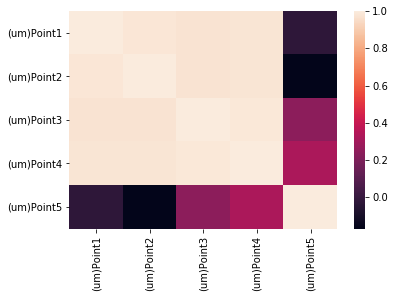

In [23]:
sns.heatmap(data_MC1[['(um)Point1','(um)Point2', '(um)Point3','(um)Point4','(um)Point5']].corr())

# Data Preparation

### Step 1: Identifying Missing Values

A heatmap is used to display the missing values found in each column. As we can observe from this heatmap, we can know that there are a few missing values in column (um)Point2, (um)Point3 and (um)Point4 but the highest amount of missing values in column (um)Point5.

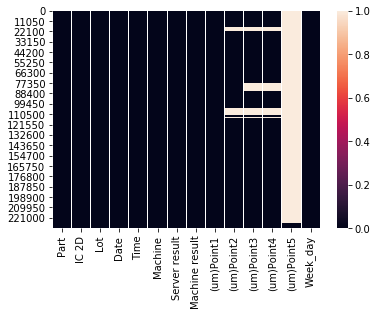

In [24]:
sns.heatmap(data=data_MC1.isnull())
plt.show()

### Step 2: Drop useless columns

After the process of data understanding, we can know that the data from (um)Point 1 to (um)Point 5 shows the event log of the machine during operation. In order to predict machine failures, these event log data are inevitable. The 'Week_day' data will be removed from the dataset after the Data Understanding Section. In addition, there is other data in the data set, such as Part, IC 2D, Lot, Date, Time, and Machine. These data have no direct relationship or help for training the machine to predict machine failures, so these data will be dropped. However, the server result will also be dropped because in the entire data set, the result consistently indicates "OK", so there is no need to include it in the data set for predicting machine failures.

In [25]:
data_MC1 = data_MC1.drop(['Week_day'], axis=1)

data_MC1 = data_MC1.drop(columns=['Part','IC 2D', 'Lot', 'Date', 'Time', 'Machine', 'Server result'], axis=1)
data_MC1

,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,OK,24.6,16.9,-19.8,41.4,NaN
1,OK,9.1,5.9,-26.3,15.3,NaN
2,OK,59.6,32.3,19.0,89.8,NaN
3,OK,67.2,37.2,10.0,101.7,NaN
4,OK,-1.8,6.0,54.7,99.6,NaN
...,...,...,...,...,...,...
232038,OK,11.3,8.6,54.0,9.2,34.9
232039,OK,17.9,6.7,78.8,18.0,20.0
232040,OK,14.1,8.7,54.6,14.3,20.6
232041,OK,6.1,12.8,49.4,21.5,22.1


In addition, The machine result will be encoded into 1 and 0 while 1 means "OK" and 0 means "NG" using the label encoder.

In [26]:
#relabel the result become 1 and 0
le = LabelEncoder()
data_MC1['Machine result'] = le.fit_transform(data_MC1['Machine result'])
data_MC1

,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,1,24.6,16.9,-19.8,41.4,NaN
1,1,9.1,5.9,-26.3,15.3,NaN
2,1,59.6,32.3,19.0,89.8,NaN
3,1,67.2,37.2,10.0,101.7,NaN
4,1,-1.8,6.0,54.7,99.6,NaN
...,...,...,...,...,...,...
232038,1,11.3,8.6,54.0,9.2,34.9
232039,1,17.9,6.7,78.8,18.0,20.0
232040,1,14.1,8.7,54.6,14.3,20.6
232041,1,6.1,12.8,49.4,21.5,22.1


### Step 3: Outliers Detection

Outliers are those that are abnormally high or low compared to other data values, until the upper and lower limits of the data set are exceeded. In fact, boxplots and the interquartile range of the data attributes of the dataset are usually used to detect outliers. If the outliers are not deleted, the outliers may destroy the accuracy, because some models are highly sensitive to outliers, such as K-Nearest Neighbors.

C:\Users\ProAdmin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


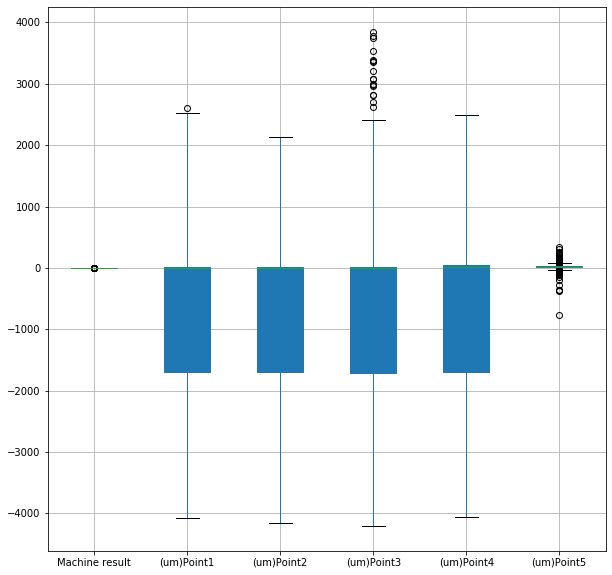

In [27]:
plt.subplots(figsize = (10,10))
data_MC1.boxplot(patch_artist= True)

From the box plot above, we can see that there are no outliers in (um)Point2 and (um)Point4. (um)Point1 and (um)Point3 have a few outliers, and (um)Point5 has the most outliers.

### Step 4: Removing outliers

The interquartile range method is used to remove outliers. The formula is ( outlier < lower limit (lower limit = first quartile - 1.5 * interquartile range) and outlier > upper limit (upper limit = third quartile + 1.5 * interquartile range)).

In [28]:
for col in ['(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5']:
    Q1 = data_MC1[col].quantile(0.25)
    Q3 = data_MC1[col].quantile(0.75)
    interQR = Q3 - Q1

    data_MC1 = data_MC1[~((data_MC1[col] < (Q1-1.5*interQR)) | (data_MC1[col] > (Q3+1.5*interQR)))]

#display rows remaining after removing outliers
print("Row left:",data_MC1.shape[0])

Row left: 231840


After removing the outliers, there are only 231840 rows left after removing the outliers. The diagram showing the dataset after removing outliers.

C:\Users\ProAdmin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


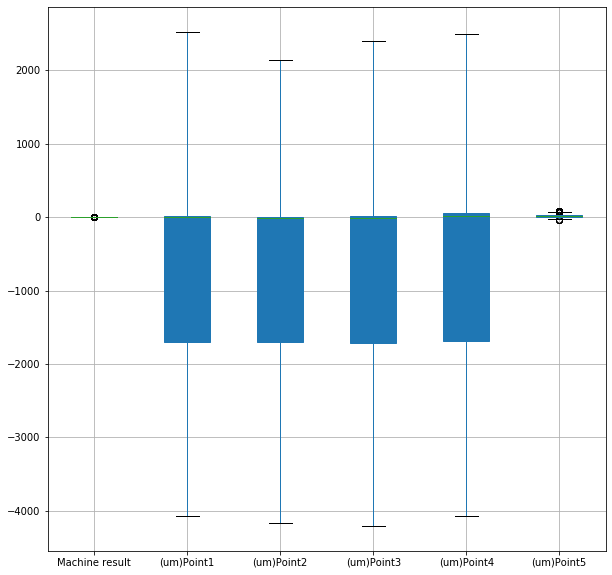

In [29]:
plt.subplots(figsize = (10,10))
data_MC1.boxplot(patch_artist= True)

### Step 5: Filling in missing values

There are four methods that can be used in filling in missing values, which are fill up with 0, mean value, median value and absolute value.

In [30]:
#fill with 0
data = data_MC1.fillna(0)
#fill with Median
data = data_MC1.fillna(data_MC1.median())
#fill with absolute
data = data_MC1.fillna(data_MC1.mean()).abs()
#fill with Mean
data = data_MC1.fillna(data_MC1.mean())

### Step 6: Feature and targeting

After that, The (um)Point1, (um)Point2, (um)Point3, (um)Point4, (um)Point5 columns are selected as the features and 'Machine result' column as the target.

In [31]:
#drop the machine result column
x = data.drop('Machine result', axis=1) #all the point data : feature
y = le.fit_transform(data['Machine result'])  #array with value 1 and 0 : label

### Step 7: Fix imbalance data

Since the machine results in the data set are not balanced by RandomUnderSampler, it will be used to balance the number of data between the machine result "OK" and "NG".

In [32]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(x,y)

### Step 8: Dataset grouping

The data set should be divided into two parts, one of the larger part is used as the training data set, and the smaller part is used as the test data set. This is because the training model requires the training data set to understand the target based on features, and the test data set needs to determine the accuracy and mean square error of the model. In this case, the training data set is set to contain 80% of the data set, and the test data set will get the remaining 20%.

In [33]:
# Split the dataset into 80% train & 20% test
xtrain_data, xtest_data, ytrain_data, ytest_data = train_test_split(x, y, test_size=0.2, random_state=42)
rus_xtrain_data, rus_xtest_data, rus_ytrain_data, rus_ytest_data = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

## ANN Preprocessing

On the other hand, there are slightly different Artificial for Neural Network(ANN) preprocessing parts. The reason is because the condition of the ANN dataset cannot contain “NaN” value, all the dataset must be in array form by following the sequence accordingly. By importing sklearn preprocessing library with combination of this scaling function, the dataset will become clean and tidy. 

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x_rus)

x_scale

array([[0.61833902, 0.66139155, 0.68591692, 0.63810859, 0.45990361],
       [0.61729238, 0.66046999, 0.6768135 , 0.63104016, 0.45990361],
       [0.63290102, 0.67070245, 0.67549789, 0.62916641, 0.45990361],
       ...,
       [0.61979522, 0.66205888, 0.63196177, 0.61167814, 0.45990361],
       [0.61880925, 0.66012044, 0.63481982, 0.62295107, 0.45990361],
       [0.61849071, 0.66145511, 0.63444177, 0.62384986, 0.45990361]])

Moreover, a normal machine learning model just requires two sets of preprocessed data, which is test data and train data. But the neural network model requires one additional data, which is validation data. The purpose of having validation data is to do cross-validation checks to prevent the overfitting  problem occurring. 

In [35]:
# # Split the dataset into 80% train & 20% test
ann_xtrain_data, ann_x_val_and_test, ann_ytrain_data, ann_y_val_and_test = train_test_split(x_scale, y_rus, test_size=0.3)
ann_xval_data, ann_xtest_data, ann_yval_data, ann_ytest_data = train_test_split(ann_x_val_and_test, ann_y_val_and_test, test_size=0.5)

print(ann_xtrain_data.shape, ann_xval_data.shape, ann_xtest_data.shape, ann_ytrain_data.shape, ann_yval_data.shape, ann_ytest_data.shape)

(12762, 5) (2735, 5) (2735, 5) (12762,) (2735,) (2735,)


Finally, after all the steps of data preparation the dataset becomes clean and is ready to be used in our model to do the data training, prediction and also visualization

# Modelling

## Modelling Construction

In this project, we will separate the data set into a training set and testing set in a ratio of 80:20 by using train_test_split in sklearn.model_selection. The will be 4 different classifier that will be used to train and to test as mentioned below: 
    1. Artificial Neural Network (ANN)
    2. Random Forest Classifier
    3. Gaussian Naive Bayes classifier 
    4. K-nearest neighbor classifier 


## Artificial Neural Network(ANN)

ANN is a  type of deep learning technology which is also an artificial intelligence. With the biological concept, ANN follows the structure of the neuron inside our brain (Refer appendix 4). So that it transmits the signal through the synapses by carrying all the data to another neuron. By using ANN as a supervised model to do the classification, at first we have to understand the structure of the neural network while implementing our model (Refer appendix 5). The model consists of at least 3 layers, which are the input layer, hidden layer and also output later. At the input layer, is the initial stage by receiving the given input from the user and there might be more than one input data. Next, there are possible more than one hidden layer based on the user and all the operations are done by the hidden layer. The hidden layer is where the neuron is allocated at, and the number of neurons set by the user. Last output later also has the possibility of more than one output, because whenever predictions happen, there might be more than one possible outcome. 


In [36]:
# Define Sequential model with 3 layers (layer by layer)

model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(5,)),
        layers.Dense(1, activation='sigmoid'),
])

In [37]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
hist = model.fit(ann_xtrain_data, ann_ytrain_data,
          batch_size=10, epochs=10,
          validation_data=(ann_xval_data, ann_yval_data), verbose=2)

Epoch 1/10
1277/1277 - 3s - loss: 0.6828 - accuracy: 0.5995 - val_loss: 0.6741 - val_accuracy: 0.6201
Epoch 2/10
1277/1277 - 2s - loss: 0.6684 - accuracy: 0.6066 - val_loss: 0.6628 - val_accuracy: 0.6066
Epoch 3/10
1277/1277 - 2s - loss: 0.6585 - accuracy: 0.6023 - val_loss: 0.6555 - val_accuracy: 0.6106
Epoch 4/10
1277/1277 - 2s - loss: 0.6522 - accuracy: 0.5999 - val_loss: 0.6516 - val_accuracy: 0.6000
Epoch 5/10
1277/1277 - 2s - loss: 0.6486 - accuracy: 0.5997 - val_loss: 0.6483 - val_accuracy: 0.6073
Epoch 6/10
1277/1277 - 2s - loss: 0.6469 - accuracy: 0.5988 - val_loss: 0.6466 - val_accuracy: 0.6040
Epoch 7/10
1277/1277 - 2s - loss: 0.6455 - accuracy: 0.5993 - val_loss: 0.6457 - val_accuracy: 0.6037
Epoch 8/10
1277/1277 - 2s - loss: 0.6443 - accuracy: 0.5987 - val_loss: 0.6453 - val_accuracy: 0.6029
Epoch 9/10
1277/1277 - 2s - loss: 0.6441 - accuracy: 0.5987 - val_loss: 0.6462 - val_accuracy: 0.6091
Epoch 10/10
1277/1277 - 2s - loss: 0.6431 - accuracy: 0.5997 - val_loss: 0.6490 - 

In [39]:
model.evaluate(ann_xtest_data, ann_ytest_data)[1]


86/86 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.5656


0.5656307339668274

In [40]:
score = model.evaluate(ann_xtest_data, ann_ytest_data,verbose=1)

print(score)

86/86 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.5656
[0.6526418328285217, 0.5656307339668274]


# Visualizing Loss and Accuracy

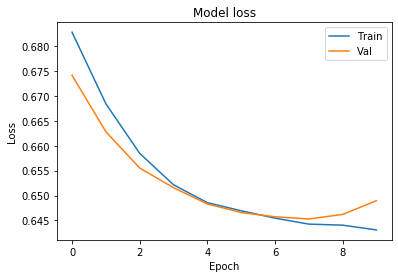

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Display accuracy of ANN

In [42]:
#load into classifier
ann = model #RandomForestClassifier(n_estimators=67)
ddd = ann.fit(xtrain_data, ytrain_data)


y_pred = ann.predict(xtest_data)

print("Mean squared error :", mean_squared_error(ytest_data, y_pred)) 

5796/5796 [==============================] - 15s 3ms/step - loss: 6.5787 - accuracy: 0.9570
Mean squared error : 0.0332059232827617


## Random Forest Classifier (RFC)

random forest classifier is a supervised classification algorithm which can be used for classification and regression kind of problems. This model is learned through the integration of many decision trees. Each decision tree has different splitting methods (according to different feature subsets, this kind of integrated learning is also called feature subset bagging algorithm). The focus of random forest is sampling, and the sampling method is random. With randomness, the results of the tree will be diverse, and there will be multiple results, which will be more accurate when combined. The sample sampling design of random forest is to adopt the method of sampling and returning, that is, after the same sample is selected, it may still be selected the next time. A sample may be selected many times, or may not be selected. Finally, these different decision trees are voted on to get the final result.


In [43]:
#load into classifier
rfc = RandomForestClassifier(n_estimators=67)
rfc.fit(xtrain_data, ytrain_data)


y_pred = rfc.predict(xtest_data)
rfc_mse = mean_squared_error(ytest_data, y_pred)
rfc_pre = precision_score(ytest_data, y_pred)
rfc_acc = accuracy_score(ytest_data, y_pred)
rfc_rec = recall_score(ytest_data, y_pred)
rfc_f1s = f1_score(ytest_data, y_pred)

print("Mean squared error :", rfc_mse) 
print("Precision score :", rfc_pre)
print("Accuracy score :", rfc_acc)
print("Recall score :", rfc_rec)  
print("F1 score :", rfc_f1s)
print(classification_report(ytest_data, y_pred))

Mean squared error : 0.031314699792960664
Precision score : 0.9699328449328449
Accuracy score : 0.9686853002070394
Recall score : 0.9983616858925446
F1 score : 0.9839419610271836
              precision    recall  f1-score   support

           0       0.86      0.24      0.37      1810
           1       0.97      1.00      0.98     44558

    accuracy                           0.97     46368
   macro avg       0.91      0.62      0.68     46368
weighted avg       0.97      0.97      0.96     46368



## Gaussian Naive Bayes (GNB)

It is machine learning classification algorithms in the supervised learning category based on the Bayes theorem. It can be considered a very simple classification technique but however, it has a very high funtiantionality. Normally Bayes theorem can be used to calculate conditional probability. This classifier can be used and applied to many real life situations such as text classification, sentiment analysis and so on.  Naive bayes is a very easy to build compared to other models or classifiers, and especially useful for very large data sets. It is known to outperform even highly sophisticated classification methods. Although it is easy to build, there are still pros and cons respectively of easy and fast to predict class of test data set, and also the probability outputs by using predict_proba are not to be taken too seriously as it might not be significantly accurate.

In [44]:
gnb = GaussianNB()
gnb.fit(xtrain_data, ytrain_data)

gnb_y_pred = gnb.predict(xtest_data)
gnb_mse = mean_squared_error(ytest_data, gnb_y_pred)
gnb_pre = precision_score(ytest_data, gnb_y_pred)
gnb_acc = accuracy_score(ytest_data, gnb_y_pred)
gnb_rec = recall_score(ytest_data, gnb_y_pred)
gnb_f1s = f1_score(ytest_data, gnb_y_pred)


print("Mean squared error :", gnb_mse) 
print("Precision score :", gnb_pre)
print("Accuracy score :", gnb_acc)
print("Recall score :", gnb_rec)  
print("F1 score :", gnb_f1s)
print(classification_report(ytest_data, gnb_y_pred))

Mean squared error : 0.04742494824016563
Precision score : 0.9610152151672797
Accuracy score : 0.9525750517598344
Recall score : 0.9908433951254545
F1 score : 0.975701388965624
              precision    recall  f1-score   support

           0       0.04      0.01      0.02      1810
           1       0.96      0.99      0.98     44558

    accuracy                           0.95     46368
   macro avg       0.50      0.50      0.50     46368
weighted avg       0.93      0.95      0.94     46368



## Gaussian Naive Bayes resample

In [45]:
gnb = GaussianNB()
gnb.fit(rus_xtrain_data, rus_ytrain_data)

rus_gnb_y_pred = gnb.predict(rus_xtest_data)

rus_gnb_mse = mean_squared_error(rus_ytest_data, rus_gnb_y_pred)
rus_gnb_pre = precision_score(rus_ytest_data, rus_gnb_y_pred)
rus_gnb_acc = accuracy_score(rus_ytest_data, rus_gnb_y_pred)
rus_gnb_rec = recall_score(rus_ytest_data, rus_gnb_y_pred)
rus_gnb_f1s = f1_score(rus_ytest_data, rus_gnb_y_pred)


print("Mean squared error :", rus_gnb_mse) 
print("Precision score :", rus_gnb_pre)
print("Accuracy score :", rus_gnb_acc)
print("Recall score :", rus_gnb_rec)  
print("F1 score :", rus_gnb_f1s)
print(classification_report(rus_ytest_data, rus_gnb_y_pred))

Mean squared error : 0.4129421442281327
Precision score : 0.6587225929456625
Accuracy score : 0.5870578557718673
Recall score : 0.37574768896139205
F1 score : 0.47853185595567865
              precision    recall  f1-score   support

           0       0.56      0.80      0.66      1808
           1       0.66      0.38      0.48      1839

    accuracy                           0.59      3647
   macro avg       0.61      0.59      0.57      3647
weighted avg       0.61      0.59      0.57      3647



# K-Nearest Neighbors

Besides, the K-nearest neighbor (KNN) classifier is one of the most popular algorithms in machine learning.  KNN is very simple and easy-to-implement as a supervised machine learning algorithm. It can be used for 2 purposes which are solving classification and regression problems. Normally a supervised machine learning algorithm relies on labeled input data to learn and train while it will try to produce an output when there is new unlabeled data. Using K-Nearest Neighbour, we predict the category of the test point from the available class labels by finding the distance between the test point and trained k nearest feature values. By selecting an optimal K value will be able to achieve the maximum accuracy of the model.We will use the scikit-learn library to implement the KNN algorithm.

In [46]:
#set the range from 1 to 40 and increments the step by 2
k_values = [i for i in range(1,40,2)]
#Empty array
k_acc_scores = []

for k in k_values:
    #To set the number of neighbors to use for kneighbors queries and using all processors to run for neighbors search.
    #Evaluate a score by cross-validation
    #To adds a single item to the existing list
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs= -1)    
    cv_scores = cross_val_score(knn, xtrain_data, ytrain_data, cv=5, scoring="accuracy")    
    k_acc_scores.append(cv_scores.mean())
    
#To get the best value of K 
optimal_k =k_values[k_acc_scores.index(max(k_acc_scores))]
print("Optimal K is {}".format(optimal_k))

Optimal K is 15


<function matplotlib.pyplot.show(*args, **kw)>

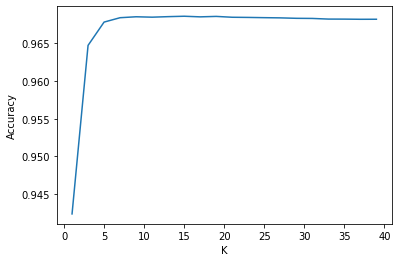

In [47]:
#Plot k_values(X) and k_acc_scores(Y) using default line style and color
#Display all open figures
plt.plot(k_values, k_acc_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show

In [48]:
#Fit the k-nearest neighbors classifier from the training dataset.
#Predict the class labels with the xtest_data.
knn.fit(xtrain_data, ytrain_data)


knn_y_pred = knn.predict(xtest_data)
knn_mse = mean_squared_error(ytest_data, knn_y_pred)
knn_pre = precision_score(ytest_data, knn_y_pred)
knn_acc = accuracy_score(ytest_data, knn_y_pred)
knn_rec = recall_score(ytest_data, knn_y_pred)
knn_f1s = f1_score(ytest_data, knn_y_pred)

print("Mean squared error :", knn_mse) 
print("Precision score :", knn_pre)
print("Accuracy score :", knn_acc)
print("Recall score :", knn_rec)  
print("F1 score :", knn_f1s)
print(classification_report(ytest_data, knn_y_pred))
print(confusion_matrix(ytest_data, knn_y_pred))

Mean squared error : 0.03135783298826777
Precision score : 0.9688070999738971
Accuracy score : 0.9686421670117322
Recall score : 0.9995511468198752
F1 score : 0.9839390257373246
              precision    recall  f1-score   support

           0       0.95      0.21      0.34      1810
           1       0.97      1.00      0.98     44558

    accuracy                           0.97     46368
   macro avg       0.96      0.60      0.66     46368
weighted avg       0.97      0.97      0.96     46368

[[  376  1434]
 [   20 44538]]


# Evaluation

After proper data cleaning and using different models to train the dataset, we found that Artificial Neural Networks are not suitable as the model of this project due to value error mentioned on 4.3 “ValueError: Classification metrics can't handle a mix of binary and continuous targets” and other model result are not better than Random Forest model. In this case, we confirmed that the Random Forest Classifier model is the best model for this data as it gives the highest accuracy, recall and precision among the other models.

### Evaluate table

In [49]:
evaluate_table = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'Gaussian Naive Bayes', 'K-Nearest Neighbors'],
    'Precision': ["%.4f"%rfc_pre, "%.4f"%gnb_pre, "%.4f"%knn_pre],
    'Accuracy': ["%.4f"%rfc_acc, "%.4f"%gnb_acc, "%.4f"%knn_acc],
    'Recall': ["%.4f"%rfc_rec, "%.4f"%gnb_rec, "%.4f"%knn_rec],
    'F1 Score': ["%.4f"%rfc_f1s, "%.4f"%gnb_f1s, "%.4f"%knn_f1s]})

evaluate_table

,Model,Precision,Accuracy,Recall,F1 Score
0,Random Forest Classifier,0.9699,0.9687,0.9984,0.9839
1,Gaussian Naive Bayes,0.9610,0.9526,0.9908,0.9757
2,K-Nearest Neighbors,0.9688,0.9686,0.9996,0.9839


### Evaluate graph

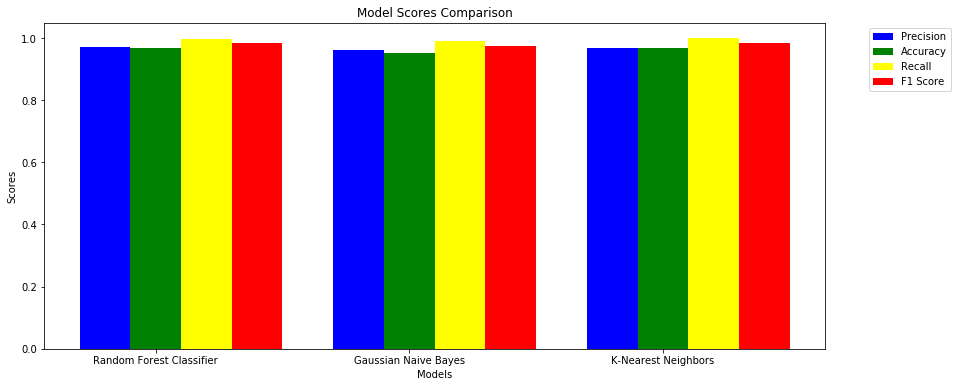

In [50]:
plt.subplots(figsize = (14,6))
N = 3
ind = np.arange(N) 
width = 0.20

#mse_list = [rfc_mse, gnb_mse, knn_mse]
#bar1 = plt.bar(ind+width, mse_list, 0.2, color = 'brown')

pre_list = [rfc_pre, gnb_pre, knn_pre]
bar2 = plt.bar(ind+width*2, pre_list, 0.2, color = 'blue')

acc_list = [rfc_acc, gnb_acc, knn_acc]
bar3 = plt.bar(ind+width*3, acc_list, 0.2, color = 'green')

rec_list = [rfc_rec, gnb_rec, knn_rec]
bar4 = plt.bar(ind+width*4, rec_list, 0.2, color = 'yellow')

f1s_list = [rfc_f1s, gnb_f1s, knn_f1s]
bar5 = plt.bar(ind+width*5, f1s_list, 0.2, color = 'red')

plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Model Scores Comparison")
  
plt.xticks(ind+width*3, ['Random Forest Classifier', 'Gaussian Naive Bayes','K-Nearest Neighbors'])
plt.legend( (bar2, bar3, bar4, bar5), ('Precision', 'Accuracy',  'Recall', 'F1 Score'),bbox_to_anchor=(1.05, 1),loc='upper left' )
plt.show()

### The best model

In [51]:
print(classification_report(ytest_data, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.24      0.37      1810
           1       0.97      1.00      0.98     44558

    accuracy                           0.97     46368
   macro avg       0.91      0.62      0.68     46368
weighted avg       0.97      0.97      0.96     46368



### The worst model

In [52]:
print(classification_report(ytest_data, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.04      0.01      0.02      1810
           1       0.96      0.99      0.98     44558

    accuracy                           0.95     46368
   macro avg       0.50      0.50      0.50     46368
weighted avg       0.93      0.95      0.94     46368



# Deployment

Choosing appropriate modelling is very important to predict the machine failure rate. The purpose is to help us to understand more about the machine down time, optimize the operation so that with this project, we can reduce the machine down time. In this case, Hotayi companies are able to take immediate decisions such as optimizing the operation in time as a prevention of machine down. Among the four models that we have constructed, we decide to select the Random Forest classifier as the deployment model. Based on the evaluation, we can see that Random Forest has the highest values for the precision, accuracy and F1 score. 

### Save the best model

In [53]:
with open("best_RFC_Model.pkl", 'wb') as file:
    pickle.dump(rfc, file)

### Load the best model

In [54]:
#trying to load the KNN model back from pickle file
with open("best_RFC_Model.pkl", 'rb') as file:  
    prediction_model = pickle.load(file)

prediction_model

RandomForestClassifier(n_estimators=67)

### Show the model accuracy

In [55]:
pred_y = prediction_model.predict(xtest_data)

accuracy = accuracy_score(ytest_data, pred_y) * 100
print("The accuracy is %.2f"%accuracy,"%")

The accuracy is 96.87 %


### Prediction

In [56]:
def prediction(P1, P2, P3, P4, P5):
    if P1=='':
        P1=0
    if P2=='':
        P2=0
    if P3=='':
        P3=0
    if P4=='':
        P4=0
    if P5=='':
        P5=0
        
    result = prediction_model.predict([[P1, P2, P3, P4, P5]])
    
    if result == [0]:
        return 'NG'
    else:
        return 'OK'   

In [61]:
#get the input
P1 = input("Enter the Point 1 :")
P2 = input("Enter the Point 2 :")
P3 = input("Enter the Point 3 :")
P4 = input("Enter the Point 4 :")
P5 = input("Enter the Point 5 :")

result = prediction(P1, P2, P3, P4, P5)
print('Predicted Machine Result:', result)

#NG=5.9  1.3  38.4  303.6  4.3
#OK=7.6  7.1  22.2  -17.8  2.6


Enter the Point 1 :22
Enter the Point 2 :13
Enter the Point 3 :12
Enter the Point 4 :24
Enter the Point 5 :11
Predicted Machine Result: OK


# Conclusion

In conclusion, the best model to use for this database is the Random Forest Classifier module. It is best to be applied compared to other 3 types of modelling with using AOI dataset. With using one set from AOI, Random Forest Classifier has the best accuracy and precision out of 4 modelling. Besides, AOI dataset does have some missing value on some columns which will cause error on some classifiers but however, random forest classifier is able to automatically handle the missing values. This classifier is one of the easiest to implement and be used. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. It will create as many trees on the subset of the data and combine all the output of these trees so that it will not encounter the overfitting problem from the decision trees and be accurate in predicting the outcomes of the untrained data. Not only this, the Random Forest algorithm is very stable, even if a new data point is introduced in the dataset, it will not affect much of the model because the data may only affect one or few of the decision tree and very hard to affect all of the tree. Since the AOI dataset can be regarded as a large dataset, Random Forest classifier is the best model compared to other modules because it can handle high dimensional spaces as well as a large number of training examples. Although it can handle large datasets, it may require a longer time period of training as it needs to generate a lot of trees and make decisions on the majority of votes.  Lastly, in future, we will try to increase and enhance the precision and the accuracy of the classifier by applying more training.  
